## AirBnb data analysis

#### Importing packages

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
from scipy import stats


#### Importing data set

In [6]:
bnb = pd.read_csv("AB_NYC_2019.csv")
bnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
bnb.shape

(48895, 16)

#### 16columns amd 48895 observations

In [5]:
bnb.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#### Missing values

In [6]:
bnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

There are missing values in only 4 columns, If the number of reviews per month is equal to 0 then it makes no sence to have a last review.

### Asumption test

In [7]:
assumption_test = bnb.loc[(bnb.last_review.isnull()) & (bnb.reviews_per_month.isnull()), ['number_of_reviews',  'last_reviews', 'reviews_per_month']]
assumption_test.head()

C:\Users\Usuario\Anaconda3\lib\site-packages\pandas\core\indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


,number_of_reviews,last_reviews,reviews_per_month
2,0,NaN,NaN
19,0,NaN,NaN
26,0,NaN,NaN
36,0,NaN,NaN
38,0,NaN,NaN


In [7]:
assumption_test.shape

(10052, 3)

Conclusion:  In this three columns there are 10052 missing values or number of reviews equal to 0

### Filling the missing values in reviews_per_month and last_revies with 0.

In [8]:
bnb.reviews_per_month.fillna(0, inplace=True)
bnb.last_review.fillna(0, inplace=True)

In [9]:
bnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Les't start by analysing the host IDs and see if each ID have more than one rental 

In [82]:
bnb.host_id.value_counts().head(10)

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [102]:
bnb.groupby('host_id')[['price']].sum().head(10).sort_values(by = 'host_id', ascending = False)

,price
host_id,
3563,35
3415,59
3211,90
3151,69
2881,117
2868,60
2845,324
2787,604
2571,182


There are several hosts with many properties

### Let's plot this IDs and their amount of properties

Text(0.5, 1.0, 'Listings by host ID')

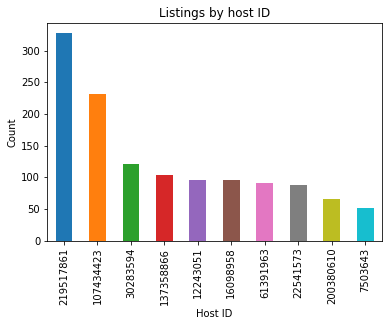

In [86]:
bnb.host_id.value_counts().head(10).plot(kind = 'bar')
plt.xlabel('Host ID')
plt.ylabel('Count')
plt.title('Listings by host ID')

### Finding the distribution of rentals by neighbourhood group

In [10]:
 bnb.neighbourhood.value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

Most properties are located in Williamsburg

### Plotting the distribution

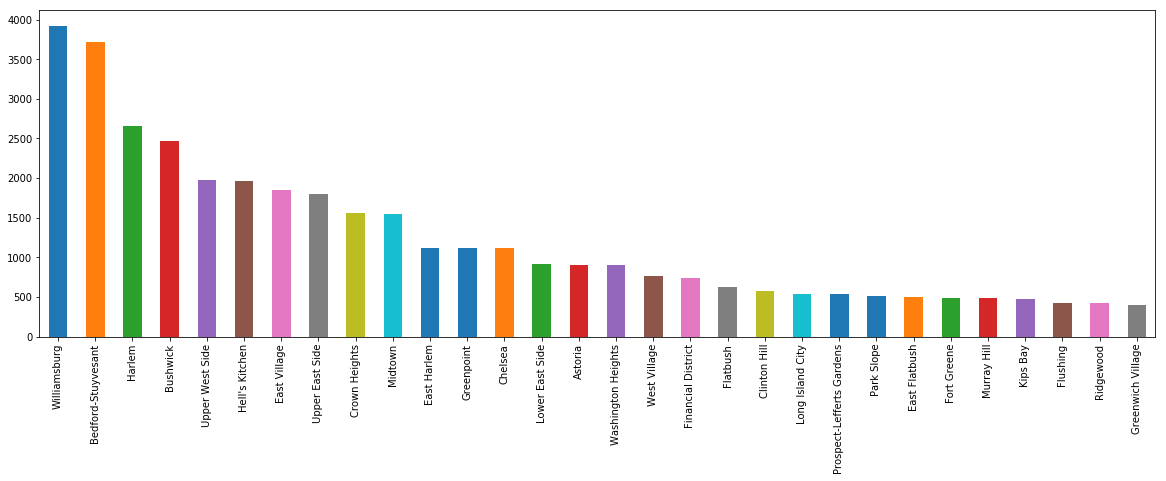

In [46]:
plt.figure(figsize=(20,6))
bnb.neighbourhood.value_counts().head(30).plot("bar")

The concentration of properties in williamsburg and bedford are exponentially higher than the rest of neigbourghood groups

### Lets visualize neighbourhood_groups

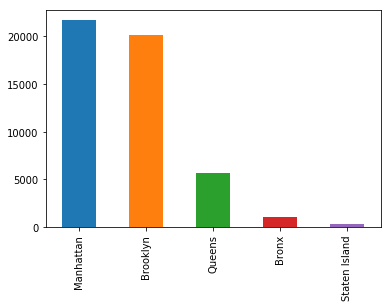

In [33]:
bnb['neighbourhood_group'].value_counts().plot.bar()

Most rentals are located in Manhattan

### What is the distribution among room types?

In [11]:
bnb.room_type.value_counts().head()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

### What is the potential money to make dayly grouped by room type

In [12]:
bnb[['room_type', 'price']].groupby('room_type').sum()

,price
room_type,
Entire home/apt,5381480
Private room,2004450
Shared room,81348


In a perfect scenario, there would be the potential to move 5.381.480 dollars a day if all entire homes are rented at the same time.

In [37]:
bnb[['price']].sum()

price    7467278
dtype: int64

With a potential market size of 7.467.278 Dollars a day

### Now lets see the potential by neighbourhood

In [13]:
bnb[['neighbourhood_group', 'price', 'room_type']].groupby('neighbourhood_group').sum()

,price
neighbourhood_group,
Bronx,95459
Brooklyn,2500600
Manhattan,4264527
Queens,563867
Staten Island,42825


The highest concentraton of potencial income is in manhattan eventho this neighbourhood is not the one with the biggest amount of properties

### Now lets visualize this potential money by  room type and Neihgbourhood

Text(0.5, 1.0, 'Potential market size by neighbourhood_group')

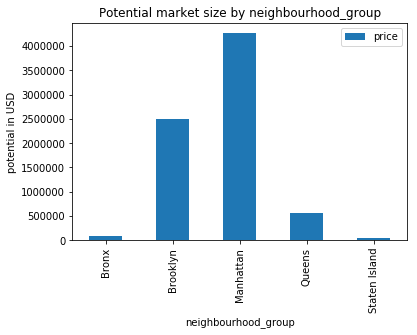

In [14]:
bnb[['neighbourhood_group', 'price', 'room_type']].groupby('neighbourhood_group',).sum().plot(kind = "bar")
plt.ylabel("potential in USD")
plt.title('Potential market size by neighbourhood_group')

The biggest concentration is located in Manhattan

Text(0.5, 1.0, 'Potential market size by neighbourhood_group')

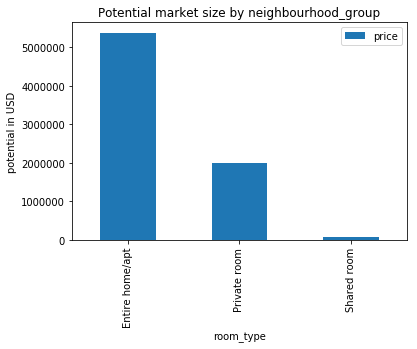

In [15]:
bnb[['neighbourhood_group', 'price', 'room_type']].groupby('room_type',).sum().plot(kind = "bar")
plt.ylabel("potential in USD")
plt.title('Potential market size by neighbourhood_group')

Entire home seems to have the biggest profitability

### Now lets visualize room type VS neighbourhood by price

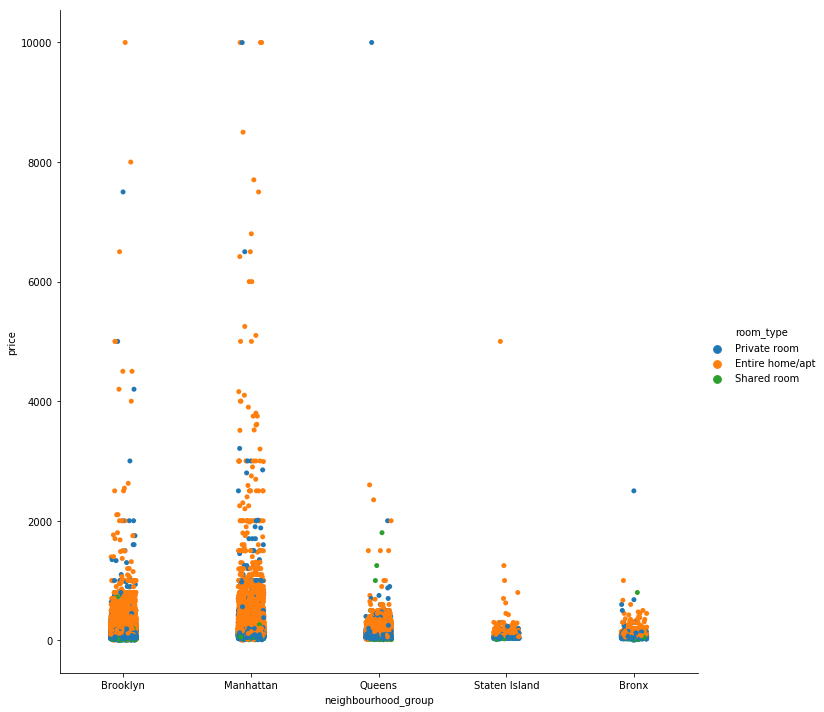

In [16]:
sns.catplot('neighbourhood_group', 'price',  hue = 'room_type', data = bnb, height = 10)

- There are private rooms that seems to be as expensive as private properties
- The majority of room-types are entire properties
- The biggest concentration of prices is on the 0 to 2000 usd range

#### Lets take a look at the room types by neighbourhood group

Text(0.5, 1.0, 'Room Types for Each Neighbourhood Group')

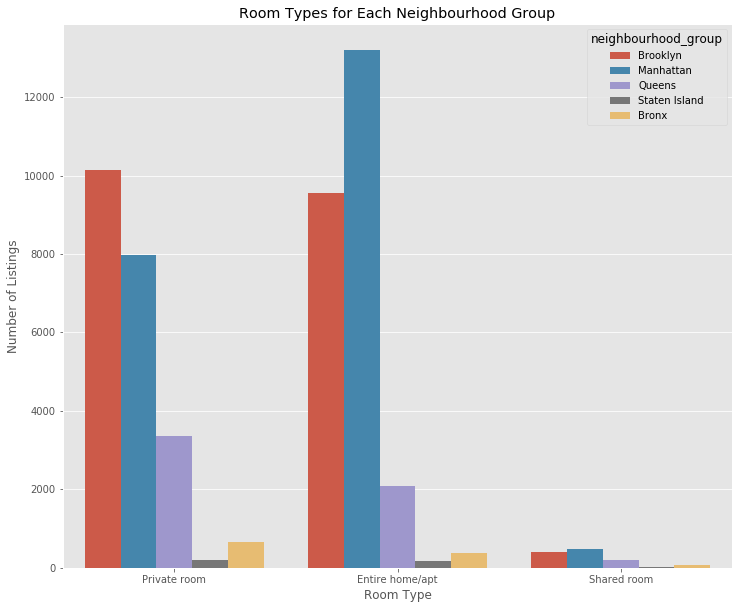

In [169]:
plt.figure(figsize=(12, 10))
x1 = sns.countplot(bnb['room_type'],hue=bnb['neighbourhood_group'])
x1.set_xlabel('Room Type')
x1.set_ylabel('Number of Listings')
x1.set_title('Room Types for Each Neighbourhood Group')

In [17]:
bnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Lets take a look at the price vs number of reviews without outlier

Text(0.5, 1.0, 'Price vs number of reviews')

<Figure size 2160x432 with 0 Axes>

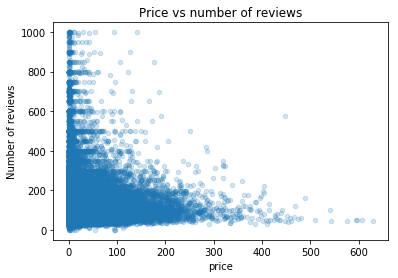

In [78]:
out1 = bnb[bnb.price < 1000]

plt.figure(figsize=(30,6))
x2 = out1.plot.scatter(y = "price", x = "number_of_reviews", alpha = 0.2)
x2.set_xlabel('price')
x2.set_ylabel('Number of reviews')
x2.set_title('Price vs number of reviews')

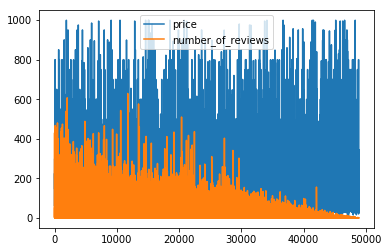

In [76]:
out = bnb[bnb.price < 1000]
out[['price', "number_of_reviews"]].plot()

The price of the property is not a guarantee for more or less reviews 

### Lets view the availability vs price

Text(0.5, 1.0, 'Availability vs Price')

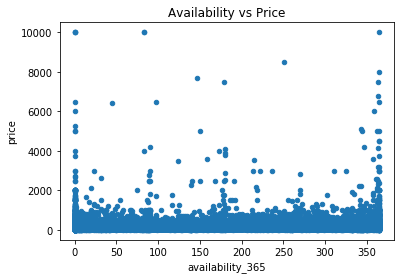

In [73]:

bnb.plot.scatter("availability_365",  "price")
plt.title('Availability vs Price')

There seems to be no corelation between the two variables

### Finding out if there is any corelation amonth all variables

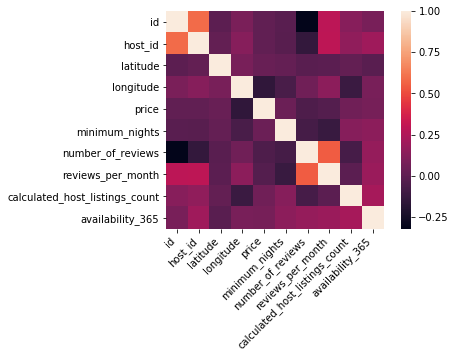

In [29]:
corr = bnb.corr()
ax = sns.heatmap(corr, square=True)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

At first glance doesn't seem to be any corelation among the variables

### Comparing number_of_reviews, price and availability_365

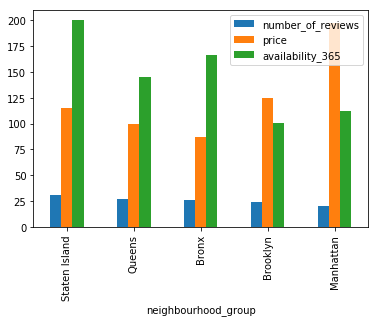

In [40]:
bnb.groupby('neighbourhood_group')['number_of_reviews', "price", 'availability_365'].mean().sort_values(ascending = False, by = 'number_of_reviews').plot.bar()

- The number of reviews, in average, is higher in areas with higher availability
- Higher prices are not linked to more reviews, lower prices have more reviews in average 
- Brooklyn and Manhattan are themos popular areas with also the highest prices

### Showing the concentration of the properties arround New York

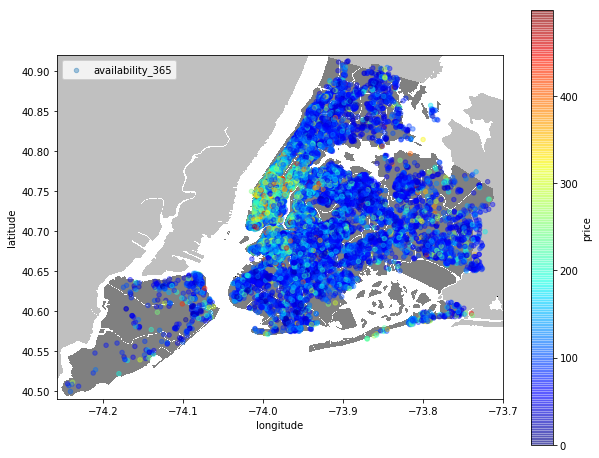

In [63]:
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
yx = bnb[bnb.price< 500 ]
#using scatterplot again
yx.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)
plt.legend()
plt.show()

In [8]:
bnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [28]:
bnb.groupby("host_name")["host_name"].count().head(50).sort_values(ascending = False)

host_name
Aaron                       72
Abby                        30
AFI Apartments              29
A                           10
A.J.                         6
(Email hidden by Airbnb)     6
@ Art House Monique          4
A. Nicholas                  4
475                          4
Abbey                        4
A.B.                         3
A. Kaylee                    3
Abdul                        2
Aamir                        2
Aaron & Ivy                  2
AJ And Freddy                2
Abc                          2
Abdes                        2
A.M                          1
371                          1
2018Serenity                 1
A & H                        1
A Tree Grows In Brooklyn     1
0123                         1
A-B                          1
-TheQueensCornerLot          1
(Mary) Haiy                  1
(Ari) HENRY LEE              1
5 Star Stays                 1
Abdul Fattah                 1
A.R.                         1
AGood                        

#### Most properties are owned by people called Michael

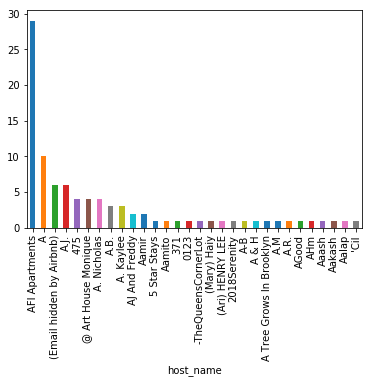

In [31]:
bnb.groupby("host_name")["host_name"].count().head(30).sort_values(ascending = False).plot.bar()

#### AFI apartments has the most properties in town. This also shows that many properties are owned by companies instead of individuals.

C:\Users\Usuario\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


KeyboardInterrupt: 

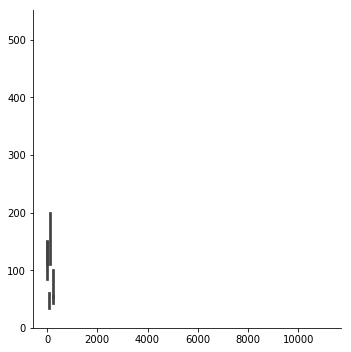

In [4]:
sns.catplot(x = "host_name", y = "price", hue = "neighbourhood", kind = "bar", data = bnb).head(30)

### Erasing ID, description, host name and host ID

In [42]:
bnb = bnb.drop(columns = ["id", "name", "host_id", "host_name", "neighbourhood_group"])
bnb.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [43]:
dummies = pd.get_dummies(bnb["neighbourhood"])
dummies.head()

,Allerton,Arden Heights,Arrochar,Arverne,Astoria,Bath Beach,Battery Park City,Bay Ridge,Bay Terrace,"Bay Terrace, Staten Island",...,Westerleigh,Whitestone,Williamsbridge,Williamsburg,Willowbrook,Windsor Terrace,Woodhaven,Woodlawn,Woodrow,Woodside
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Merging both data frames

In [44]:
bnb = pd.concat([bnb, dummies], axis = 1)
bnb.head()

,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,...,Westerleigh,Whitestone,Williamsbridge,Williamsburg,Willowbrook,Windsor Terrace,Woodhaven,Woodlawn,Woodrow,Woodside
0,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,...,0,0,0,0,0,0,0,0,0,0
1,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,...,0,0,0,0,0,0,0,0,0,0
2,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,...,0,0,0,0,0,0,0,0,0,0
3,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,...,0,0,0,0,0,0,0,0,0,0
4,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,...,0,0,0,0,0,0,0,0,0,0


#### Now that the neighbourhood has been dummifyed, I can remove the neighbourhood column.

In [45]:
bnb = bnb.drop(columns = ['neighbourhood'])
bnb.head()

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,...,Westerleigh,Whitestone,Williamsbridge,Williamsburg,Willowbrook,Windsor Terrace,Woodhaven,Woodlawn,Woodrow,Woodside
0,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,...,0,0,0,0,0,0,0,0,0,0
1,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,...,0,0,0,0,0,0,0,0,0,0
2,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365,...,0,0,0,0,0,0,0,0,0,0
3,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,...,0,0,0,0,0,0,0,0,0,0
4,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,...,0,0,0,0,0,0,0,0,0,0


#### Dummyfying room type

In [46]:
room_dummy = pd.get_dummies(bnb['room_type'])

In [47]:
room_dummy.head()

,Entire home/apt,Private room,Shared room
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


#### Attaching new data frame and droping room_type column

In [48]:
bnb = pd.concat([bnb, room_dummy], axis = 1)
bnb.head()

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,...,Williamsburg,Willowbrook,Windsor Terrace,Woodhaven,Woodlawn,Woodrow,Woodside,Entire home/apt,Private room,Shared room
0,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,...,0,0,0,0,0,0,0,0,1,0
1,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,...,0,0,0,0,0,0,0,1,0,0
2,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365,...,0,0,0,0,0,0,0,0,1,0
3,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,...,0,0,0,0,0,0,0,1,0,0
4,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,...,0,0,0,0,0,0,0,1,0,0


In [49]:
bnb = bnb.drop(columns = ['room_type'])
bnb.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Allerton,...,Williamsburg,Willowbrook,Windsor Terrace,Woodhaven,Woodlawn,Woodrow,Woodside,Entire home/apt,Private room,Shared room
0,40.64749,-73.97237,149,1,9,2018-10-19,0.21,6,365,0,...,0,0,0,0,0,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,2019-05-21,0.38,2,355,0,...,0,0,0,0,0,0,0,1,0,0
2,40.80902,-73.94190,150,3,0,0,0.00,1,365,0,...,0,0,0,0,0,0,0,0,1,0
3,40.68514,-73.95976,89,1,270,2019-07-05,4.64,1,194,0,...,0,0,0,0,0,0,0,1,0,0
4,40.79851,-73.94399,80,10,9,2018-11-19,0.10,1,0,0,...,0,0,0,0,0,0,0,1,0,0


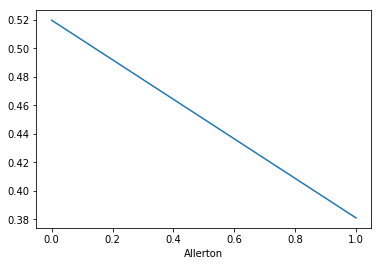

In [57]:
bnb.groupby('Allerton')["Entire home/apt"].mean().plot()